In [323]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [324]:
train=pd.read_excel('Data_train.xlsx')

In [325]:
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


Observation:
    
    We can see we have 12690 rows and 9 columns in train dataset

In [326]:
train.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

Observation :
    
     We can see we have 2 integer and 7 object columns

In [327]:
test=pd.read_excel('Data_test.xlsx')

In [328]:
test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


observation:
    
    We can see we have 4231 rows and 9 columns

In [329]:
test.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

Observation:
    
    We can see we have 7 object columns and 1 integer column in the test dataset

In [330]:
train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

Observation:
    
    We can see we have null values present in city,locality,ratings and votes

In [331]:
test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

We can see we have null values present in city,locality,rating and votes

In [332]:
train['TITLE'].value_counts()[:30]

QUICK BITES                   4218
CASUAL DINING                 3652
None                          1003
CAFÉ                           607
DESSERT PARLOR                 382
CASUAL DINING,BAR              349
FINE DINING                    308
BAKERY                         302
BEVERAGE SHOP                  156
BAR,CASUAL DINING              128
LOUNGE                          98
BAKERY,QUICK BITES              92
BAR                             91
FOOD COURT                      78
CASUAL DINING,CAFÉ              56
MESS                            53
KIOSK                           53
BAKERY,DESSERT PARLOR           51
PUB                             50
SWEET SHOP,QUICK BITES          48
DESSERT PARLOR,QUICK BITES      48
DHABA                           45
SWEET SHOP                      44
QUICK BITES,SWEET SHOP          35
CAFÉ,CASUAL DINING              35
BEVERAGE SHOP,QUICK BITES       33
CAFÉ,DESSERT PARLOR             32
FINE DINING,BAR                 32
FOOD TRUCK          

Observation:
    
    We can see we have Quick_bites,Casual_dining,Cafe,Desert_parlor,Fine_dining,Bar,Bakery,Bevarage_shop,Food_court these tiles are present in very high number.
    
    So, we are going to add features of those and add values '1' or '0' as if they are present or not.

In [333]:
# train
def fun(title,value):
  for data in dat:
    if data.find(value) !=-1:
      title.append(int(1))
    else :
      title.append(int(0))
def to_df(lst):
  lst=pd.DataFrame(lst)
  return lst

col=['Quick_bites','Casual_dining','Cafe','Desert_parlor','Fine_dining','Bar','Bakery','Bevarage_shop','Food_court']

In [334]:
dat=train['TITLE']

Quick_bites=[]
Casual_dining=[]
Cafe=[]
Desert_parlor=[]
Fine_dining=[]
Bar=[]
Bakery=[]
Bevarage_shop=[]
Food_court=[]

fun(Quick_bites,'QUICK BITES')
fun(Casual_dining,'CASUAL DINING')
fun(Cafe,'CAFE')
fun(Desert_parlor,'DESSERT PARLOR')
fun(Fine_dining,'FINE DINING')
fun(Bar,'BAR')
fun(Bakery,'BAKERY')
fun(Bevarage_shop,'BEVERAGE SHOP')
fun(Food_court,'FOOD COURT')

Quick_bites=to_df(Quick_bites)
Casual_dining=to_df(Casual_dining)
Cafe=to_df(Cafe)
Desert_parlor=to_df(Desert_parlor)
Fine_dining=to_df(Fine_dining)
Bakery=to_df(Bakery)
Bar=to_df(Bar)
Bevarage_shop=to_df(Bevarage_shop)
Food_court=to_df(Food_court)

train.drop('TITLE',axis=1,inplace=True)
train=pd.concat([Quick_bites,Casual_dining,Cafe,Desert_parlor,Fine_dining,Bar,Bakery,Bevarage_shop,Food_court,train],axis=1)

mx=train.columns[9:]
for i in mx:
  col.append(i)
train.columns=col
train.head()


,Quick_bites,Casual_dining,Cafe,Desert_parlor,Fine_dining,Bar,Bakery,Bevarage_shop,Food_court,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,0,1,0,0,0,0,0,0,0,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,0,1,0,0,0,1,0,0,0,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,0,1,0,0,0,0,0,0,0,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,1,0,0,0,0,0,0,0,0,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,0,0,0,1,0,0,0,0,0,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [335]:
test['TITLE'].value_counts()[:20]

QUICK BITES               1416
CASUAL DINING             1258
None                       284
CAFÉ                       223
DESSERT PARLOR             126
CASUAL DINING,BAR          114
FINE DINING                 98
BAKERY                      90
BEVERAGE SHOP               60
BAR,CASUAL DINING           47
LOUNGE                      38
BAKERY,QUICK BITES          34
BAR                         33
FOOD COURT                  32
SWEET SHOP                  23
SWEET SHOP,QUICK BITES      22
KIOSK                       20
PUB                         17
DHABA                       16
MESS                        15
Name: TITLE, dtype: int64

Observation:
    
    We can see we have Quick_bites,Casual_dining,Cafe,Desert_parlor,Fine_dining,Bar,Bakery,Bevarage_shop,Food_court these tiles are present in very high number.
    
    So, we are going to add features of those and add values '1' or '0' as if they are present or not.

In [336]:
# test
dat=test['TITLE']

Quick_bites=[]
Casual_dining=[]
Cafe=[]
Desert_parlor=[]
Fine_dining=[]
Bar=[]
Bakery=[]
Bevarage_shop=[]
Food_court=[]

fun(Quick_bites,'QUICK BITES')
fun(Casual_dining,'CASUAL DINING')
fun(Cafe,'CAFE')
fun(Desert_parlor,'DESSERT PARLOR')
fun(Fine_dining,'FINE DINING')
fun(Bar,'BAR')
fun(Bakery,'BAKERY')
fun(Bevarage_shop,'BEVERAGE SHOP')
fun(Food_court,'FOOD COURT')

Quick_bites=to_df(Quick_bites)
Casual_dining=to_df(Casual_dining)
Cafe=to_df(Cafe)
Desert_parlor=to_df(Desert_parlor)
Fine_dining=to_df(Fine_dining)
Bakery=to_df(Bakery)
Bar=to_df(Bar)
Bevarage_shop=to_df(Bevarage_shop)
Food_court=to_df(Food_court)

test.drop('TITLE',axis=1,inplace=True)
test=pd.concat([Quick_bites,Casual_dining,Cafe,Desert_parlor,Fine_dining,Bar,Bakery,Bevarage_shop,Food_court,test],axis=1)

column=['Quick_bites','Casual_dining','Cafe','Desert_parlor','Fine_dining','Bar','Bakery','Bevarage_shop','Food_court']
mx=train.columns[9:]
for i in mx:
  column.append(i)
train.columns=column
train.head()


,Quick_bites,Casual_dining,Cafe,Desert_parlor,Fine_dining,Bar,Bakery,Bevarage_shop,Food_court,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,0,1,0,0,0,0,0,0,0,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,0,1,0,0,0,1,0,0,0,13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,0,1,0,0,0,0,0,0,0,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,1,0,0,0,0,0,0,0,0,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,0,0,0,1,0,0,0,0,0,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [337]:
train['CUISINES'].value_counts()[:30]

South Indian                           532
North Indian                           526
North Indian, Chinese                  501
Fast Food                              286
Chinese                                167
Bakery                                 148
Bakery, Desserts                       148
South Indian, North Indian, Chinese    139
Cafe                                   134
Kerala                                 131
Biryani                                129
Street Food                            121
Chinese, North Indian                  119
South Indian, North Indian             106
North Indian, Mughlai                  102
North Indian, Chinese, Biryani          91
North Indian, South Indian, Chinese     87
Finger Food                             87
Desserts                                87
Ice Cream, Desserts                     81
Arabian                                 80
Bakery, Fast Food                       79
North Indian, South Indian              74
North India

Observation:
    
    We can see we have South Indian,North Indian,Chinese,Bakery,Desserts,Cafe,Kerala,Biryani,Mughalai these cuisines are present in very high number.
    
    So, we are going to add features of those and add values '1' or '0' as if they are present or not.

In [338]:
# train
def cus(cusine,value):
  for data in cu:
    if data.find(value) !=-1:
      cusine.append(int(1))
    else :
      cusine.append(int(0))
def to_df(lst):
  lst=pd.DataFrame(lst)
  return lst

col=['south_indian','north_indian','chinese','bakery','desserts','cafe','kerala','biryani','mughlai']

In [339]:
#Train
cu=train['CUISINES']

south_indian=[]
north_indian=[]
chinese=[]
bakery=[]
desserts=[]
cafe=[]
kerala=[]
biryani=[]
mughlai=[]

cus(south_indian,'South Indian')
cus(north_indian,'North Indian')
cus(chinese,'Chinese')
cus(bakery,'Bakery')
cus(desserts,'Desserts')
cus(cafe,'Cafe')
cus(kerala,'Kerala')
cus(biryani,'Biryani')
cus(mughlai,'Mughlai')

south_indian=to_df(south_indian)
north_indian=to_df(north_indian)
chinese=to_df(chinese)
bakery=to_df(bakery)
desserts=to_df(desserts)
cafe=to_df(cafe)
kerala=to_df(kerala)
biryani=to_df(biryani)
mughlai=to_df(mughlai)

train.drop('CUISINES',axis=1,inplace=True)
train=pd.concat([south_indian,north_indian,chinese,bakery,desserts,cafe,kerala,biryani,mughlai,train],axis=1)

mx=train.columns[9:]
for i in mx:
  col.append(i)
train.columns=col
train.head()


,south_indian,north_indian,chinese,bakery,desserts,cafe,kerala,biryani,mughlai,Quick_bites,...,Bakery,Bevarage_shop,Food_court,RESTAURANT_ID,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,13198,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,6346,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,15387,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [340]:
test['CUISINES'].value_counts()[:30]

North Indian, Chinese                  213
North Indian                           190
South Indian                           174
Fast Food                               78
Chinese                                 59
Kerala                                  47
Cafe                                    47
North Indian, Mughlai                   45
South Indian, North Indian, Chinese     44
Bakery, Desserts                        42
Street Food                             40
Bakery                                  39
Biryani                                 35
Beverages                               32
Pizza, Fast Food                        31
Desserts                                30
North Indian, Chinese, Biryani          30
Chinese, North Indian                   30
Bakery, Fast Food                       29
South Indian, North Indian              29
Ice Cream, Desserts                     27
Finger Food                             26
North Indian, South Indian, Chinese     26
North India

In [341]:
#Test
cu=test['CUISINES']

south_indian=[]
north_indian=[]
chinese=[]
bakery=[]
desserts=[]
cafe=[]
kerala=[]
biryani=[]
mughlai=[]

cus(south_indian,'South Indian')
cus(north_indian,'North Indian')
cus(chinese,'Chinese')
cus(bakery,'Bakery')
cus(desserts,'Desserts')
cus(cafe,'Cafe')
cus(kerala,'Kerala')
cus(biryani,'Biryani')
cus(mughlai,'Mughlai')

south_indian=to_df(south_indian)
north_indian=to_df(north_indian)
chinese=to_df(chinese)
bakery=to_df(bakery)
desserts=to_df(desserts)
cafe=to_df(cafe)
kerala=to_df(kerala)
biryani=to_df(biryani)
mughlai=to_df(mughlai)

test.drop('CUISINES',axis=1,inplace=True)
test=pd.concat([south_indian,north_indian,chinese,bakery,desserts,cafe,kerala,biryani,mughlai,test],axis=1)

column=['south_indian','north_indian','chinese','bakery','desserts','cafe','kerala','biryani','mughlai']
mx=test.columns[9:]
for i in mx:
  column.append(i)
test.columns=column
test.head()


,south_indian,north_indian,chinese,bakery,desserts,cafe,kerala,biryani,mughlai,0,...,0,0,0,0,RESTAURANT_ID,TIME,CITY,LOCALITY,RATING,VOTES
0,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,4085,12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,12680,7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1411,11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,204,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,13453,11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


Extracting numerical values from VOTES column

In [342]:
# Train

train['VOTES']=train['VOTES'].str.extract('(\d+)')


#Test

test['VOTES']=test['VOTES'].str.extract('(\d+)')

In [343]:
train.head()

,south_indian,north_indian,chinese,bakery,desserts,cafe,kerala,biryani,mughlai,Quick_bites,...,Bakery,Bevarage_shop,Food_court,RESTAURANT_ID,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,13198,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,6346,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,15387,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300


In [344]:
test.head()

,south_indian,north_indian,chinese,bakery,desserts,cafe,kerala,biryani,mughlai,0,...,0,0,0,0,RESTAURANT_ID,TIME,CITY,LOCALITY,RATING,VOTES
0,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,4085,12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,12680,7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1411,11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,204,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,13453,11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23


I want to drop the null values from train and test datasets, Because they are very small 10% of the data

In [345]:
# Train
train.dropna(inplace=True)

# Test
test.dropna(inplace=True)

In [346]:
# Converting votes and rating column dtype to numeric

# Train
train['VOTES']=train['VOTES'].astype(int)
train['RATING']=train['RATING'].astype(float)

# Test
test['VOTES']=test['VOTES'].astype(int)
test['RATING']=test['RATING'].astype(float)

# Exploratory Data Analysis

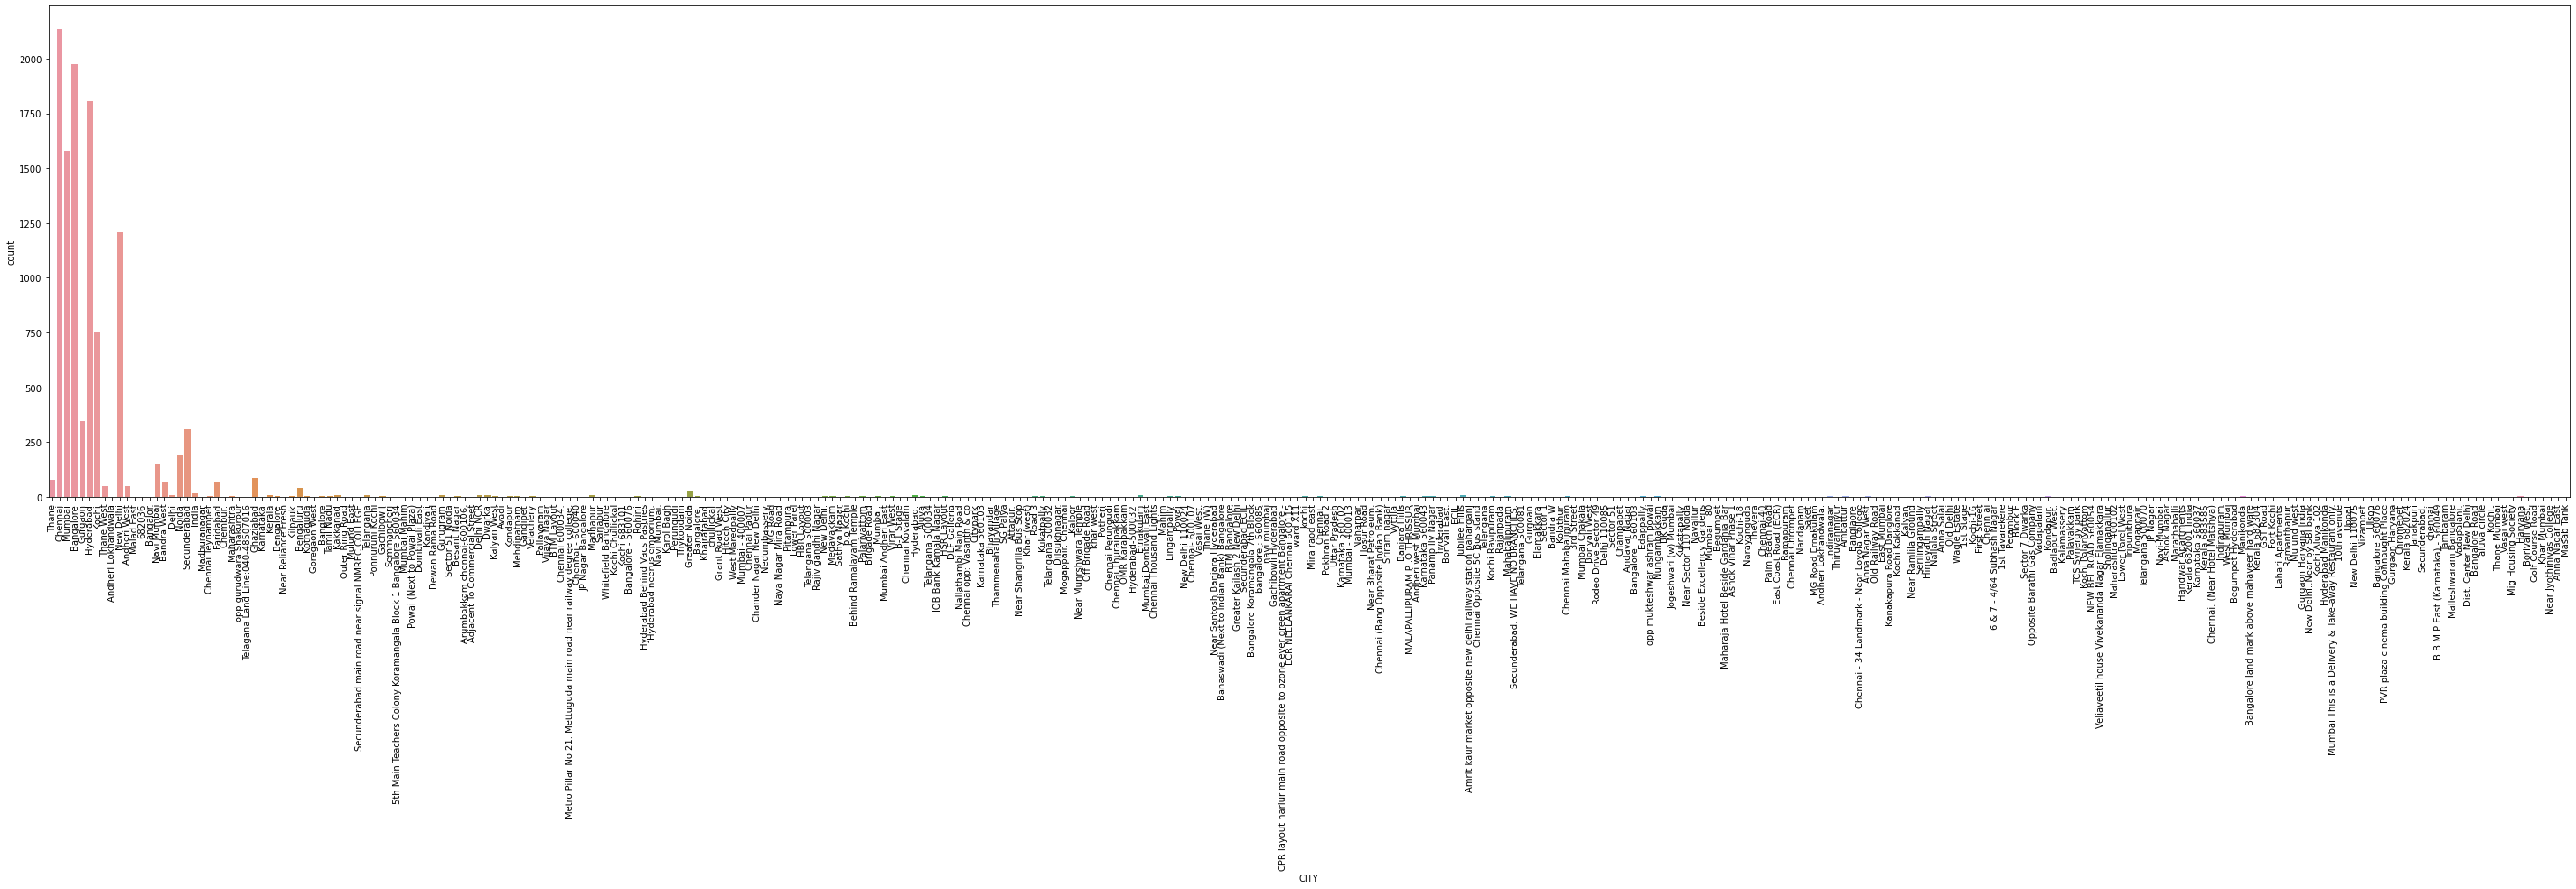

In [347]:
plt.figure(figsize=(50,10))
plt.xticks(rotation=90)
sns.countplot(train['CITY'])

Observation:
    
    We can see Chennai,Bangalore,Hyderabad and Mumbai has highest restuarants

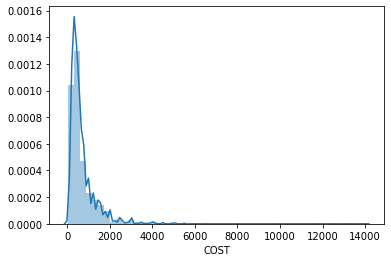

In [348]:
sns.distplot(train['COST'])

We can see the distribution of cost it is right skewed

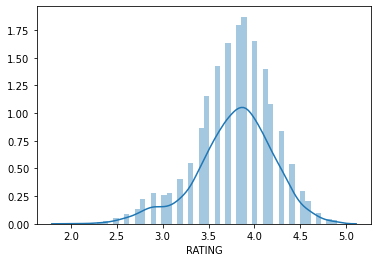

In [349]:
sns.distplot(train['RATING'])

We can see ratings are ranging from 2 to 5. We can see frequency of ratings is highest between 3.5 to 4

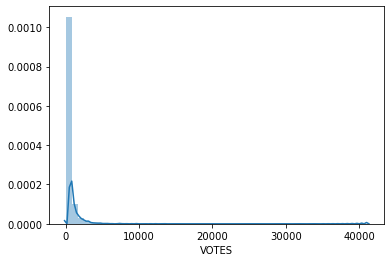

In [350]:
sns.distplot(train['VOTES'])

We can see distribution of votes is very large

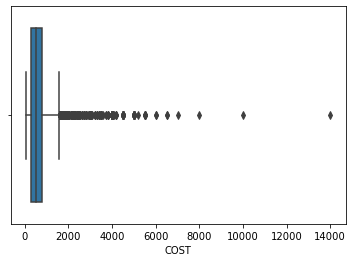

In [351]:
sns.boxplot(train['COST'])

We can see Outliers present in cost feture

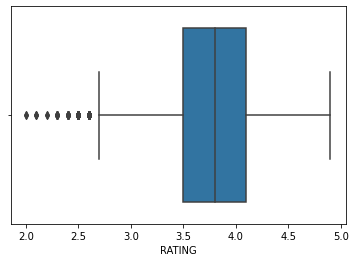

In [352]:
sns.boxplot(train['RATING'])

We can see some outliers present in Ratings feature

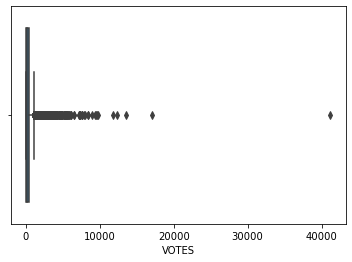

In [353]:
sns.boxplot(train['VOTES'])

We can see the outliers in votes

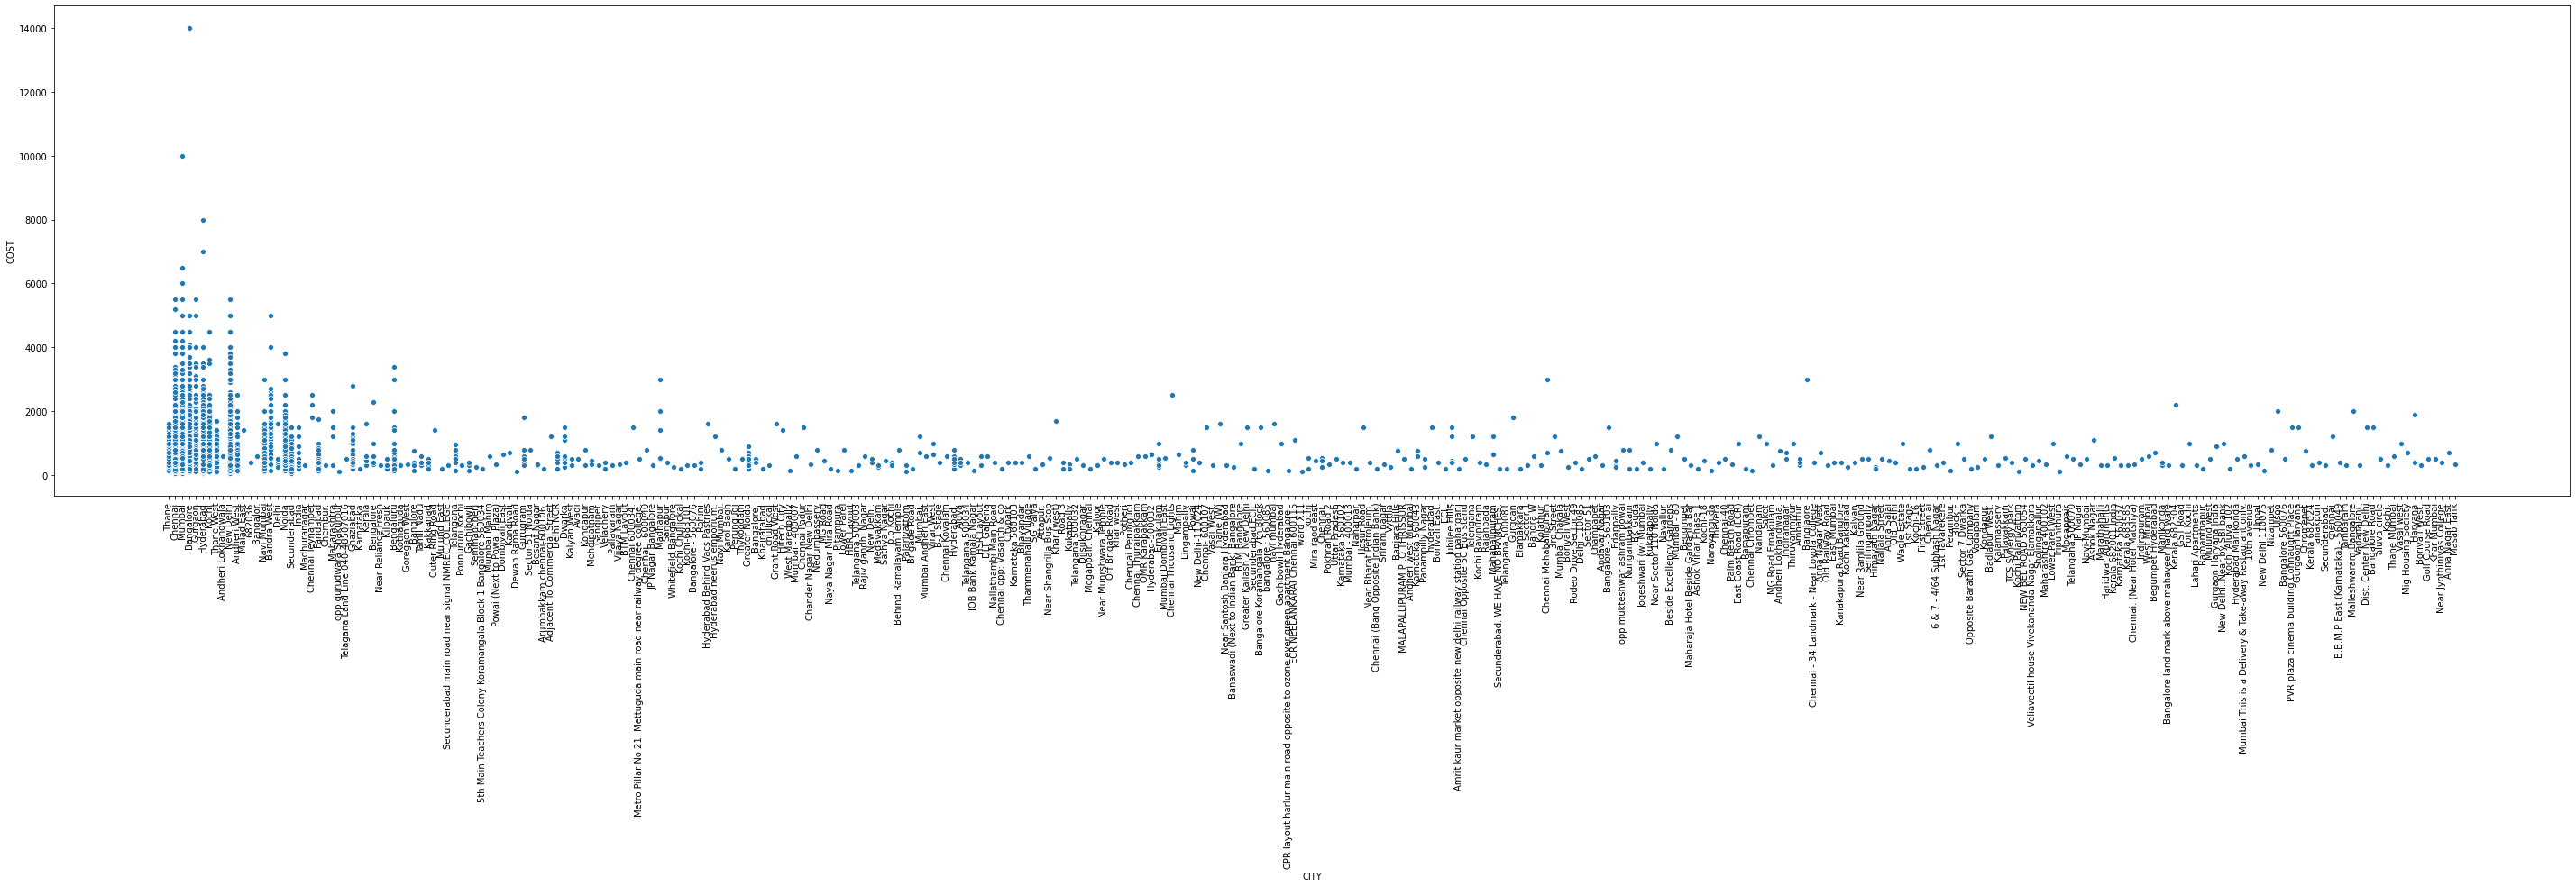

In [354]:
plt.figure(figsize=(50,10))
plt.xticks(rotation=90)
sns.scatterplot(x='CITY',y='COST',data=train)

We can see the relation between city and cost 

We can observe that cost is very high in Chennai,Bangalore,Hyderabad,Mumbai

We can observe that Bangalore has max cost of 14000

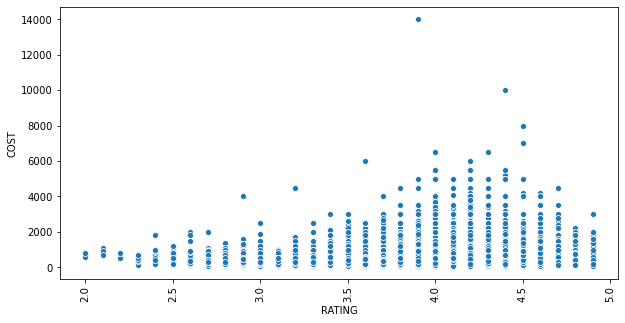

In [355]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.scatterplot(x='RATING',y='COST',data=train)

We can see the relation between rating and cost

We can see rating increasing cost is also increasing

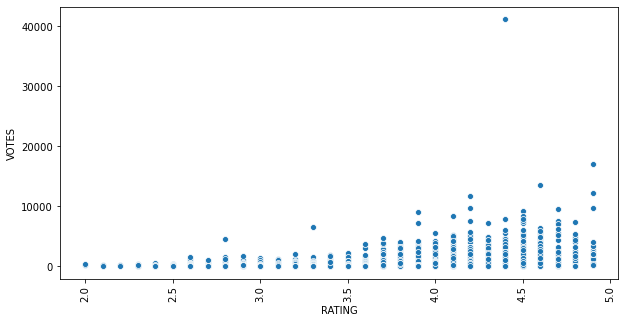

In [356]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.scatterplot(x='RATING',y='VOTES',data=train)

In [357]:
train.columns 

Index(['south_indian', 'north_indian', 'chinese', 'bakery', 'desserts', 'cafe',
       'kerala', 'biryani', 'mughlai', 'Quick_bites', 'Casual_dining', 'Cafe',
       'Desert_parlor', 'Fine_dining', 'Bar', 'Bakery', 'Bevarage_shop',
       'Food_court', 'RESTAURANT_ID', 'TIME', 'CITY', 'LOCALITY', 'RATING',
       'VOTES', 'COST'],
      dtype='object')

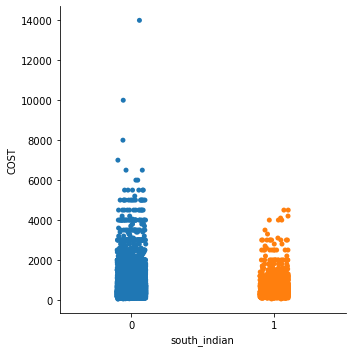

In [358]:
sns.catplot(x='south_indian',y='COST',data=train)

We can see south indian food max cost around 5000

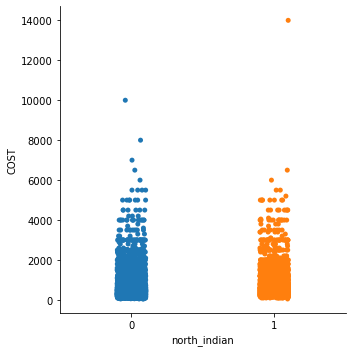

In [360]:
sns.catplot(x='north_indian',y='COST',data=train)

We can see max cost for north india food

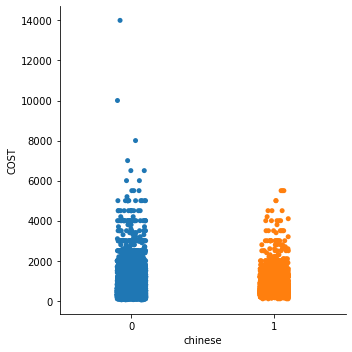

In [361]:
sns.catplot(x='chinese',y='COST',data=train)

We can see the cost of chinese food 

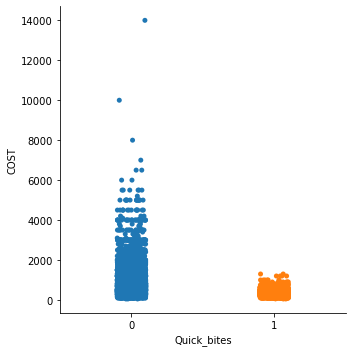

In [362]:
sns.catplot(x='Quick_bites',y='COST',data=train)

We can see quick bites has low cost

# Preprocessing

In [363]:
# Dropping un wanted columns
# locality has large number of unique areas so i want to drop the column

# Train
train.drop(['RESTAURANT_ID','TIME','LOCALITY'],axis=1,inplace=True)

#Test
test.drop(['RESTAURANT_ID','TIME','LOCALITY'],axis=1,inplace=True)

In [364]:
train

,south_indian,north_indian,chinese,bakery,desserts,cafe,kerala,biryani,mughlai,Quick_bites,...,Desert_parlor,Fine_dining,Bar,Bakery,Bevarage_shop,Food_court,CITY,RATING,VOTES,COST
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Thane,3.6,49,1200
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,Chennai,4.2,30,1500
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,Chennai,3.8,221,800
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,Mumbai,4.1,24,800
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,Mumbai,3.8,165,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,Hyderabad,3.8,546,500
12686,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,Mumbai,4.3,1214,1800
12687,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Navi Mumbai,4.0,608,1300
12688,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Chennai,3.5,32,400


Encode 

In [365]:
# encode the city column

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [366]:
# Train

train['CITY']=le.fit_transform(train['CITY'])

# Test

test['CITY']=le.fit_transform(test['CITY'])

In [367]:
train

,south_indian,north_indian,chinese,bakery,desserts,cafe,kerala,biryani,mughlai,Quick_bites,...,Desert_parlor,Fine_dining,Bar,Bakery,Bevarage_shop,Food_court,CITY,RATING,VOTES,COST
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,300,3.6,49,1200
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,63,4.2,30,1500
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,63,3.8,221,800
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,206,4.1,24,800
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,206,3.8,165,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,125,3.8,546,500
12686,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,206,4.3,1214,1800
12687,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,223,4.0,608,1300
12688,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,63,3.5,32,400


In [368]:
# Removing outliers with zscore

from scipy.stats import zscore
   
z=np.abs(zscore(train))
z

array([[0.46325538, 1.14292401, 0.74451152, ..., 0.43680224, 0.43525596,
        0.79968895],
       [0.46325538, 0.8749488 , 0.74451152, ..., 0.98539007, 0.45772856,
        1.26342921],
       [0.46325538, 1.14292401, 1.34316256, ..., 0.03726186, 0.2318198 ,
        0.18136859],
       ...,
       [0.46325538, 0.8749488 , 1.34316256, ..., 0.51132597, 0.22591156,
        0.95426904],
       [2.15863658, 1.14292401, 1.34316256, ..., 0.67383429, 0.45536302,
        0.43695177],
       [0.46325538, 1.14292401, 1.34316256, ..., 0.91086635, 0.30752258,
        0.12779159]])

In [369]:
thershold=3
print(np.where(z>3))

(array([    1,     4,     4, ..., 11384, 11384, 11389], dtype=int64), array([14,  4, 12, ...,  3,  5, 14], dtype=int64))


In [370]:
z[1][14]

4.039132291180062

In [371]:
train_new=train[(z<3).all(axis=1)]

In [372]:
train_new.shape

(7126, 22)

In [373]:
train.shape

(11393, 22)

We have removed around 3000 rows which zscore is above 3.

# Model training

In [374]:
# I want to predict restuarant food cost by regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [375]:
x=train_new.drop('COST',axis=1)

x

,south_indian,north_indian,chinese,bakery,desserts,cafe,kerala,biryani,mughlai,Quick_bites,...,Cafe,Desert_parlor,Fine_dining,Bar,Bakery,Bevarage_shop,Food_court,CITY,RATING,VOTES
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,300,3.6,49
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,63,3.8,221
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,206,4.1,24
5,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,206,4.0,550
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,113,4.3,1612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12684,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,236,3.8,492
12685,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,125,3.8,546
12687,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,223,4.0,608
12688,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,63,3.5,32


In [376]:
y=train_new['COST']

y

0        1200
2         800
3         800
5         800
7        1600
         ... 
12684     550
12685     500
12687    1300
12688     400
12689     600
Name: COST, Length: 7126, dtype: int64

In [377]:
# standardization of data

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.55260047,  1.02357274, -0.84633404, ...,  2.1343576 ,
        -0.33835463, -0.61144421],
       [-0.55260047,  1.02357274,  1.18156656, ..., -0.83006365,
         0.16474711, -0.2214851 ],
       [-0.55260047, -0.97697014,  1.18156656, ...,  0.95859559,
         0.91939972, -0.66812431],
       ...,
       [-0.55260047, -0.97697014,  1.18156656, ...,  1.1712334 ,
         0.66784885,  0.6559229 ],
       [ 1.80962567,  1.02357274,  1.18156656, ..., -0.83006365,
        -0.5899055 , -0.64998668],
       [-0.55260047,  1.02357274,  1.18156656, ..., -0.05456104,
        -0.84145637,  0.81235999]])

In [378]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [379]:
x_train.shape

(4988, 21)

In [380]:
x_test.shape

(2138, 21)

In [381]:
y_train.shape

(4988,)

In [382]:
y_test.shape

(2138,)

In [383]:
lr=LinearRegression()

In [384]:
lr.fit(x_train,y_train)

LinearRegression()

In [385]:
lr.score(x_train,y_train)

0.40751950313138785

With linear regression we got score 0.4

In [386]:
# predict the x_test

pred=lr.predict(x_test)

In [387]:
print("Mean absolute error : ",mean_absolute_error(y_test,pred))   
print("Mean squared error : ",mean_squared_error(y_test,pred))
print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,pred)))
print('r2 score :',r2_score(y_test,pred))


Mean absolute error :  211.9903813571093
Mean squared error :  100790.9139851935
Root mean squared error :  317.4758478769582
r2 score : 0.4232392812292032


# cross validation

In [388]:
from sklearn.model_selection import cross_val_score
linearscore = cross_val_score(lr,x,y,cv=5)
print(linearscore)
print(linearscore.mean(),linearscore.std())

[0.37789215 0.41264093 0.4282987  0.40617111 0.4237929 ]
0.4097591575089819 0.017761449994110518


From above scores of cross validation we can say there is no underfiting and overfiting

# Check various methods using for loops

In [389]:
# Check for various methods using for loop.
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
import warnings
warnings.filterwarnings('ignore')


model=[SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet()]

for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is : ',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("Mean absolute error : ",mean_absolute_error(y_test,predm))
    print("Mean squared error : ",mean_squared_error(y_test,predm))
    print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,predm)))
    print('r2 score :',r2_score(y_test,predm))
    print('\n')      
        

score of SVR() is :  0.23476389182743662
Mean absolute error :  220.23801003393743
Mean squared error :  137581.01039613428
Root mean squared error :  370.91914266607256
r2 score : 0.21271353430782625


score of DecisionTreeRegressor() is :  0.9949405469038413
Mean absolute error :  254.80355472404116
Mean squared error :  158964.56969130028
Root mean squared error :  398.7036113346608
r2 score : 0.09034935939053479


score of KNeighborsRegressor() is :  0.6185557466791287
Mean absolute error :  194.3264733395697
Mean squared error :  92115.02525724977
Root mean squared error :  303.5045720532885
r2 score : 0.4728857386414196


score of Lasso() is :  0.40748413021469054
Mean absolute error :  211.78439498408991
Mean squared error :  100838.14037954927
Root mean squared error :  317.5502170988854
r2 score : 0.4229690353501194


score of Ridge() is :  0.40751949769648055
Mean absolute error :  211.98905659592086
Mean squared error :  100792.24273498928
Root mean squared error :  317.4779

From above all models KneighborsRegressor is giving best accuracy, r2 score and least error.

# Ensemble

In [391]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

ensemble=[RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in ensemble:
    m.fit(x_train,y_train)
    print('score of',m,'is : ',m.score(x_train,y_train))
    predem=m.predict(x_test)
    print("Mean absolute error : ",mean_absolute_error(y_test,predem))
    print("Mean squared error : ",mean_squared_error(y_test,predem))
    print("Root mean squared error : ",np.sqrt(mean_squared_error(y_test,predem)))
    print('r2 score :',r2_score(y_test,predem))
    print('\n')      

score of RandomForestRegressor() is :  0.9161912686040158
Mean absolute error :  194.73239406965553
Mean squared error :  91411.82085309696
Root mean squared error :  302.3438784779625
r2 score : 0.47690971919230085


score of AdaBoostRegressor() is :  0.34446836737195785
Mean absolute error :  232.37908965585294
Mean squared error :  110093.92668079672
Root mean squared error :  331.8040486202613
r2 score : 0.37000420202515716


score of GradientBoostingRegressor() is :  0.5371678931147783
Mean absolute error :  191.47902369524436
Mean squared error :  88477.2243170736
Root mean squared error :  297.45121333938715
r2 score : 0.49370250279249495




From above all models RandomForestRegressor is givving the best accuracy,r2 score and least score

In [392]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9134463623588277

# Saving best model

In [394]:
# I want to save the RandomForestRegressor model 

import joblib
joblib.dump(rf,'restuarant_food_cost_model.ob')

['restuarant_food_cost_model.ob']

# Pass the test data into saved model

In [395]:
test

,south_indian,north_indian,chinese,bakery,desserts,cafe,kerala,biryani,mughlai,0,...,0,0,0,0,0,0,0,CITY,RATING,VOTES
0,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,103,4.3,564
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,90,4.2,61
2,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,90,3.8,350
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,41,3.8,1445
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,74,3.6,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,0,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,90,4.0,197
4226,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,101,3.9,287
4227,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,9,4.3,469
4228,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,41,3.7,53


In [396]:
# standardization of data

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
test_new=sc.fit_transform(test)
test_new

array([[-0.46330477,  1.11064369,  1.32644173, ...,  1.32748923,
         1.19981262,  0.15901526],
       [ 2.15840643,  1.11064369, -0.75389667, ...,  0.96891509,
         0.96878222, -0.44394334],
       [-0.46330477,  1.11064369,  1.32644173, ...,  0.96891509,
         0.0446606 , -0.09751186],
       ...,
       [-0.46330477,  1.11064369, -0.75389667, ..., -1.26527758,
         1.19981262,  0.04513639],
       [-0.46330477,  1.11064369, -0.75389667, ..., -0.38263356,
        -0.1863698 , -0.45353314],
       [-0.46330477, -0.90037877, -0.75389667, ..., -1.29286021,
        -0.1863698 , -0.44154589]])

In [398]:
# load the saved model

model=joblib.load('restuarant_food_cost_model.ob')

In [399]:
# predict the cost of test data

predictions=model.predict(test_new)
predictions

array([1063.  ,  392.5 ,  640.75, ..., 1002.5 ,  357.  ,  428.5 ])

# Save the predicions in csv file

In [400]:
# Saving predicted values in CSV file
output=pd.DataFrame(predictions)
output.columns=['Predictions']
output.to_csv('Restuarant_foodcost_final_submission.csv')